# Clasificación de imágenes KNN con OpenCV

In [2]:
# Importamos las librerias a usar
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
from imutils import paths
import seaborn as sns
import random
import time
from datetime import datetime
import cv2
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score

## Acerca del conjunto de datos

En este proyecto, trabajaremos con un conjunto de 400 imágenes, 200 de gatos y 200 de perros, cada una con sus respectivas etiquetas. Puedes descargar las imágenes desde el siguiente enlace [Dataset source](https://cv-studio-accessible.s3.us-south.cloud-object-storage.appdomain.cloud/cats_dogs_images_.zip). Nuestro objetivo es desarrollar un modelo de clasificación de imágenes utilizando visión computacional. Entrenaremos el modelo con estas imágenes para que pueda distinguir entre imágenes que contienen un perro o un gato. Una vez entrenado, podremos utilizar el modelo para detectar automáticamente si una imagen dada contiene un perro o un gato."

In [3]:
# Abre el archivo JSON con las etiquetas
with open('_annotations.json', 'r') as file:
    # Carga el contenido del archivo en una variable
    label = json.load(file)

In [4]:
# Visualiza las 5 primeras etiquetas
list(label['annotations'].items())[:5]

[('dd169a59-44c6-4e21-a0c8-81612eceab28.jpg',
  [{'label': 'cat', 'id': '6d0fe931-0ce1-4da9-a1a3-aceb290d33e6'}]),
 ('1d6a11b0-b39b-40c3-9e01-16947432aba4.jpg',
  [{'label': 'dog', 'id': '9790956b-f1c4-48a5-9cf6-d0cdb7591785'}]),
 ('0d2d39f4-46ba-4312-a0c0-0b1b990bc1db.jpg',
  [{'label': 'dog', 'id': '77c4518a-0635-448e-8822-cbd118fed1c8'}]),
 ('a69488b4-d3fc-4a99-9990-70390b2f5ba0.jpg',
  [{'label': 'dog', 'id': 'b61c3e6b-1b68-4c95-9b1e-f2252ca145e4'}]),
 ('ae73a5c5-4f84-42ba-82d2-342211b7e2fd.jpg',
  [{'label': 'cat', 'id': 'bdeec2b5-3413-4fda-8a39-efb4baf7ebe9'}])]

### Cargar y trazar la imagen 

<function matplotlib.pyplot.show(close=None, block=None)>

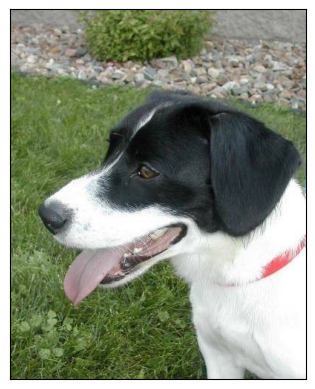

In [5]:
# Selecciona una imagen aleatoria
imagenes_aleatorias = 'cats_dogs_images/' + random.choice(list(label["annotations"].keys()))
# Abrimos la imagen
imagen_prueba = cv2.imread(imagenes_aleatorias)
# Cambiamos a formato RGB
plot = cv2.cvtColor(imagen_prueba,  cv2.COLOR_BGR2RGB)
# Vizualizamos la imagen
plt.imshow(plot)
plt.xticks([]) 
plt.yticks([])  
plt.show

Antes de utilizar el modelo, es necesario realizar el preprocesamiento de los datos, transformamos la imagen a escala de grises, lo que simplificará el proceso y disminuirá la cantidad de recursos computacionales necesarios.

<function matplotlib.pyplot.show(close=None, block=None)>

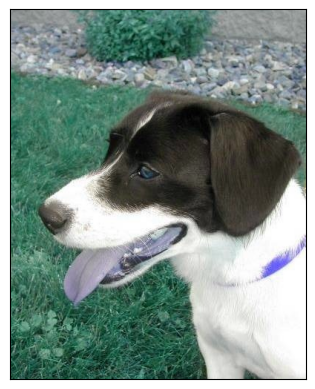

In [6]:
# Convierte la imagen a escala de grises
imagen = cv2.cvtColor(imagen_prueba, cv2.COLOR_BGR2GRAY)
# Vizualizamos la imagen
plt.imshow(imagen_prueba, cmap='gray')
plt.xticks([]) 
plt.yticks([]) 
plt.show

Cambiar el tamaño de la imagen puede acelerar el entrenamiento del algoritmo

<function matplotlib.pyplot.show(close=None, block=None)>

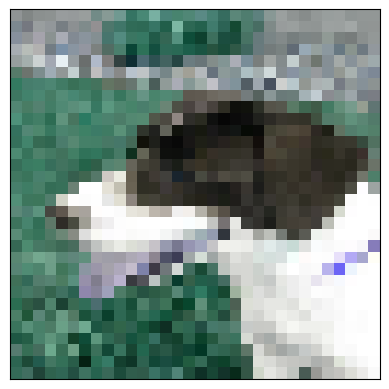

In [7]:
imagen = cv2.resize(imagen_prueba,(32,32))
# Vizualizamos la imagen
plt.imshow(imagen, cmap='gray')
plt.xticks([]) 
plt.yticks([]) 
plt.show

Aplanar la imagen para convertirla en una matriz unidimensional  que pueda ser procesada por algoritmos de machine learning. 

In [8]:
pixels = imagen.flatten()
pixels

array([144, 148, 149, ..., 250, 250, 250], dtype=uint8)

Después de aplicar estos pasos a una imagen de ejemplo y asegurarnos que todo funcione como esperas, el siguiente paso sería aplicar los mismos pasos a todas las demás imágenes en el conjunto de datos. 

In [9]:
# Crear una lista con las rutas de cada imagen
image_paths = list(paths.list_images('cats_dogs_images'))
train_imag = []
train_labels = []
class_object = label['labels']

# Iterar sobre la lista de rutas de imágenes
for (i, image_path) in enumerate(image_paths):
    # Abrir la imagen
    image = cv2.imread(image_path)
    # Convertir la imagen a escala de grises
    image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    # Etiquetas
    etiqueta = class_object.index(label['annotations'][image_path[17:]][0]['label'])
    tmp_label = label['annotations'][image_path[17:]][0]['label']
    # Redimensionar la imagen
    image = cv2.resize(image, (32, 32))
    # Aplanar la imagen
    pixels = image.flatten()
    # Agregar las imágenes aplanadas
    train_imag.append(pixels)
    train_labels.append(etiqueta)
    # Imprimir el resultado
    if tmp_label == 'cat':
        print('Cargando...', '\U0001F408', 'La imagen', str(i+1), 'es un', tmp_label)
    else:
        print('Cargando...', '\U0001F436', 'La imagen', str(i+1), 'es un', tmp_label)


Cargando... 🐈 La imagen 1 es un cat
Cargando... 🐈 La imagen 2 es un cat
Cargando... 🐈 La imagen 3 es un cat
Cargando... 🐈 La imagen 4 es un cat
Cargando... 🐈 La imagen 5 es un cat
Cargando... 🐶 La imagen 6 es un dog
Cargando... 🐶 La imagen 7 es un dog
Cargando... 🐈 La imagen 8 es un cat
Cargando... 🐈 La imagen 9 es un cat
Cargando... 🐶 La imagen 10 es un dog
Cargando... 🐈 La imagen 11 es un cat
Cargando... 🐈 La imagen 12 es un cat
Cargando... 🐶 La imagen 13 es un dog
Cargando... 🐶 La imagen 14 es un dog
Cargando... 🐈 La imagen 15 es un cat
Cargando... 🐶 La imagen 16 es un dog
Cargando... 🐈 La imagen 17 es un cat
Cargando... 🐈 La imagen 18 es un cat
Cargando... 🐈 La imagen 19 es un cat
Cargando... 🐶 La imagen 20 es un dog
Cargando... 🐈 La imagen 21 es un cat
Cargando... 🐶 La imagen 22 es un dog
Cargando... 🐶 La imagen 23 es un dog
Cargando... 🐶 La imagen 24 es un dog
Cargando... 🐈 La imagen 25 es un cat
Cargando... 🐶 La imagen 26 es un dog
Cargando... 🐶 La imagen 27 es un dog
Cargando..

creamos una matriz de imágenes de entrenamiento en formato float32 y una matriz de etiquetas en formato (label size, 1), donde cada etiqueta sea un número entero que represente la clase a la que pertenece la imagen correspondiente. 

In [10]:
# Convierte la lista de imágenes de entrenamiento en una matriz numpy de tipo float32
train_imag = np.array(train_imag).astype('float32')
# Convierte la lista de etiquetas de entrenamiento en una matriz numpy
train_labels = np.array(train_labels)

In [11]:
# Convierte las etiquetas de entrenamiento a números enteros
train_labels = train_labels.astype(int)
# Redimensiona las etiquetas de entrenamiento 
train_labels = train_labels.reshape((train_labels.size, 1))
# Imprime las etiquetas de entrenamiento
print(train_labels)

[[1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [1]
 [1]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]
 [1]
 [1]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [1]


## Modelo

Dividimos los datos en entrenamiento y prueba

In [12]:
# Divide los datos en entrenamiento y prueba
train_sample, test_sample, train_label, test_label = train_test_split(train_imag, train_labels, test_size=0.2, random_state=0)

Entrenamos el modelo KNN, evaluamos las imágenes de entrenamiento y prueba para obtener la precisión del modelo. Probamos varios valores de k para encontrar el óptimo, que determina cuántos vecinos se utilizan en el proceso de votación.

In [13]:
# Instanciamos el modelo
model = cv2.ml.KNearest_create()
# Entrenamos el modelo con los datos de entrenamiento
model.train(train_sample, cv2.ml.ROW_SAMPLE, train_label)
# Evaluamos el modelo con diferentes valores de K
valores_k = [1, 2, 3, 4, 5]
k_results = []
for k in valores_k:
    # Encontramos los K vecinos más cercanos para cada muestra de prueba
    ret, result, neighbors, dist = model.findNearest(test_sample, k=k)
    k_results.append(result)
# Aplanamos los resultados para facilitar su manejo
flattened_results = []
for result in k_results:
    flattened_result = [item for sublist in result for item in sublist]
    flattened_results.append(flattened_result)

Después de entrenar el modelo, evaluamos los resultados para determinar cuál es el mejor valor de k.

In [14]:
## Creamos una lista vacía para guardar la precisión y la matriz de confusión
accuracy = []
matrices_confusion = []

## Utilizaremos un bucle porque tenemos múltiples valores de k
for resultado_k in k_results:
    nombres_etiquetas = [0, 1]
    matriz_confusion = confusion_matrix(test_label, resultado_k, labels=nombres_etiquetas)
    matrices_confusion.append(matriz_confusion)
    
    ## Obtenemos los valores cuando predecimos correctamente
    coincidencias = resultado_k == test_label
    correctas = np.count_nonzero(coincidencias)
    
    ## Calculamos la precisión
    precision = correctas * 100.0 / result.size
    accuracy.append(precision)

## Almacenamos la precisión para más tarde cuando creemos el gráfico
resultado_precision = {valores_k[i]: accuracy[i] for i in range(len(valores_k))}
lista_resultados = sorted(resultado_precision.items())

ahora graficamos

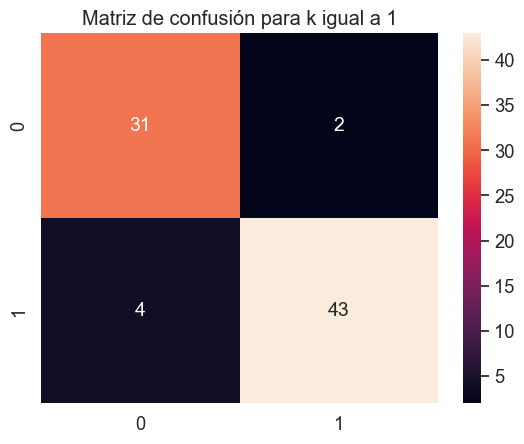

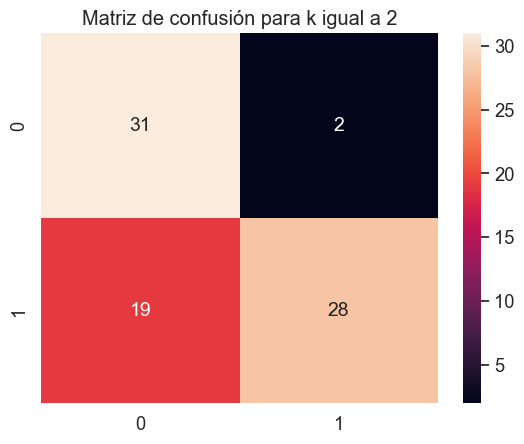

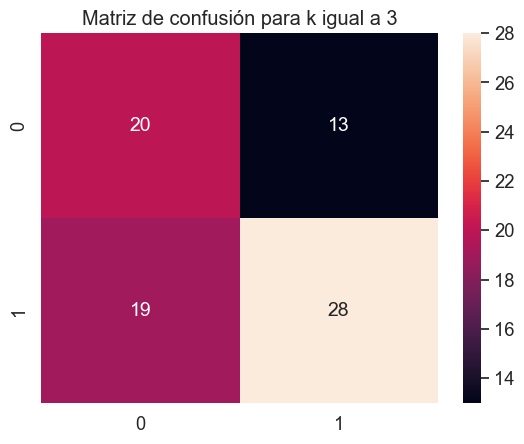

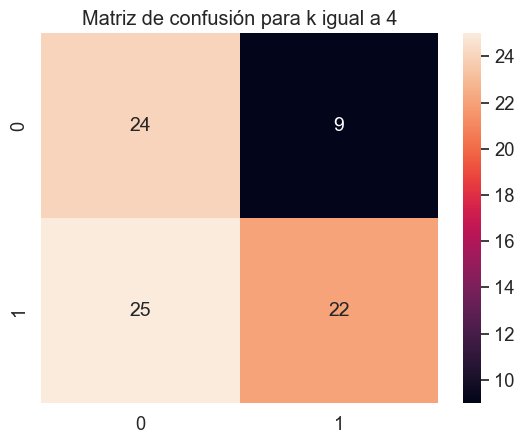

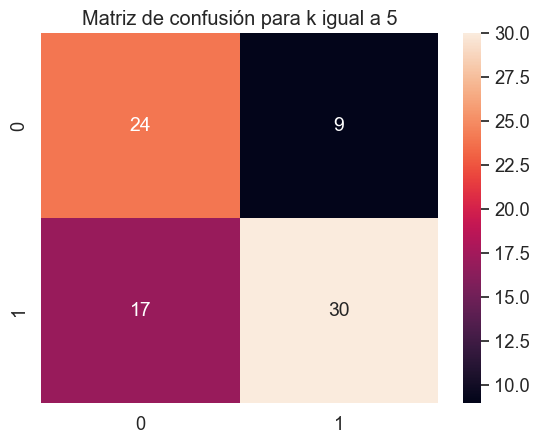

In [15]:
t = 0
## Para cada valor de k crearemos una matriz de confusión
for array in matrices_confusion:
    # Creamos un DataFrame a partir del array de la matriz de confusión
    df_cm = pd.DataFrame(array)
    # Ajustamos el tamaño de fuente para las etiquetas
    sns.set(font_scale=1.2)
    # Creamos el heatmap de la matriz de confusión
    sns.heatmap(df_cm, annot=True, annot_kws={"size": 14}, fmt=".0f")
    t += 1
    # Añadimos un título a la matriz de confusión
    plt.title("Matriz de confusión para k igual a " + str(t))
    plt.show()


Se observa que a medida que aumenta k la precisión del modelo varía

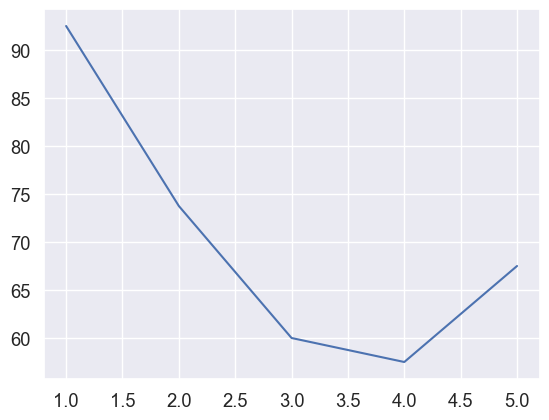

In [16]:
## Graficar la precisión
x, y = zip(*lista_resultados)
plt.plot(x, y)
plt.show()

los resultados muestran que el valor de k en el algoritmo  tiene un impacto significativo en la precisión del modelo. En este caso, k=1 proporcionó la mayor precisión del 92.5%, lo que indica que considerar solo el vecino más cercano para la clasificación dio como resultado la mejor capacidad predictiva.

In [18]:
# Guardamos el modelo para usarlo despues
model.save('knn_cats_and_dogs.yml')